In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time, TimeDelta
from sunpy.coordinates import HeliocentricInertial
import astrospice

In [2]:
from astrospice.net.sources import solo
solo_mk = solo.SolarOrbiterMetakernel()
remote_metakernel = solo_mk.get_latest_metakernel('predict')


['PATH_VALUES', '=', '(', "'C:\\Users\\Ronan\\.astrospice\\cache'", ')']
file already modified


In [3]:
local_metakernel = remote_metakernel.fetch_associated_files()

C:\Users\Ronan\.astrospice\cache
folder: C:\Users\Ronan\.astrospice\cache\ck, fname: solo_ANC_soc-sc-iboom-ck_20180930-21000101_V01.bc
C:\Users\Ronan\.astrospice\cache
folder: C:\Users\Ronan\.astrospice\cache\ck, fname: solo_ANC_soc-sc-oboom-ck_20180930-21000101_V01.bc
C:\Users\Ronan\.astrospice\cache
folder: C:\Users\Ronan\.astrospice\cache\ck, fname: solo_ANC_soc-sc-fof-ck_20180930-21000101_V02.bc
C:\Users\Ronan\.astrospice\cache
folder: C:\Users\Ronan\.astrospice\cache\ck, fname: solo_ANC_soc-eui-fsi-ck_20180930-21000101_V02.bc
C:\Users\Ronan\.astrospice\cache
folder: C:\Users\Ronan\.astrospice\cache\ck, fname: solo_ANC_soc-eui-hri-euv-ck_20180930-21000101_V02.bc
C:\Users\Ronan\.astrospice\cache
folder: C:\Users\Ronan\.astrospice\cache\ck, fname: solo_ANC_soc-eui-hri-lya-ck_20180930-21000101_V02.bc
C:\Users\Ronan\.astrospice\cache
folder: C:\Users\Ronan\.astrospice\cache\ck, fname: solo_ANC_soc-metis-euv-ck_20180930-21000101_V02.bc
C:\Users\Ronan\.astrospice\cache
folder: C:\Users\R

In [4]:
local_metakernel.furnsh()

In [5]:
dt = TimeDelta(0.5 * u.day)
times = Time(np.arange(Time('2020-02-11'), Time('2022-01-01'), dt))
coords = astrospice.generate_coords('SOLAR ORBITER', times)
print(coords[0:4])

<SkyCoord (ICRS): (x, y, z) in km
    [(-1.15824750e+08, 85728155.58794458, 37231735.31395223),
     (-1.16523239e+08, 84972737.4082924 , 36942055.61941434),
     (-1.17213802e+08, 84209522.67467579, 36648698.91408959),
     (-1.17895913e+08, 83439218.27116555, 36352107.69457504)]>


In [6]:
new_frame = HeliocentricInertial()
coords = coords.transform_to(new_frame)
print(coords[0:4])

<SkyCoord (HeliocentricInertial: obstime=['2020-02-11 00:00:00.000' '2020-02-11 12:00:00.000'
 '2020-02-12 00:00:00.000' '2020-02-12 12:00:00.000']): (lon, lat, distance) in (deg, deg, km)
    [(65.34094756, -6.57558633, 1.47660134e+08),
     (65.75775336, -6.58377849, 1.47702987e+08),
     (66.17505669, -6.59176035, 1.47742005e+08),
     (66.59253396, -6.5994639 , 1.47777308e+08)]>


Now we can plot the coordinates in this new coordinate system



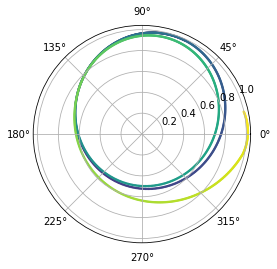

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.scatter(coords.lon.to(u.rad), coords.distance.to(u.au), c=times.jd, s=2)
plt.show()